#Importing Libraries

In [ ]:
try:
  import distrax
except:
  %pip install -qq distrax

In [ ]:
import jax.numpy as jnp
import jax
import distrax
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from ipywidgets import interact, interactive
import ipywidgets as widgets

#Discrete Random Variable

Example:

Let us role 2 tetrahedral dice. The output of would be a number between $0$ and $3$. Hence, with 2 dice we get total of 16 possible values varying from $(0,0), (0,1), \dots, (3,2),(3,3)$. The probability of every sample in samples space is $\dfrac{1}{16}$. Further, we consider random variable as sum of the numbers appearing on both the die. Hence, our sample space will be $0, 1, 2, 3, 4, 5, 6$. In this example, we plot Probability Mass Function and Cumulative Distribution Function corresponding to considered random variable. Further we also calculated theoretical and experimental value of mean and variance.

In [ ]:
#As the die is a tetrahedral die with no bias, the probability of individual number is 4
dice = distrax.Categorical(probs=[[1/4]*4, [1/4]*4])
print(f"Number of categories: {dice.num_categories}")

Number of categories: 4


In [ ]:
#We extract 300000 random samples to calculate sum of the 2 dies.
key = jax.random.PRNGKey(1)
n_samples = 300000
samples = dice.sample(seed=key, sample_shape=n_samples)
sum = samples[:,0] + samples[:,1]

#Counting number of times, the random variable takes individual values from sample space
count = Counter(map(int, sum.tolist()))
print(f"Number of occurence: {count}")

Number of occurence: Counter({3: 74728, 2: 56545, 4: 56364, 5: 37554, 1: 37253, 0: 18887, 6: 18669})


In [ ]:
#Printing the sample space
sample_space = jnp.unique(sum, axis=0)
print(f"Sample Space: {sample_space.tolist()}")

Sample Space: [0, 1, 2, 3, 4, 5, 6]


To calculate Probability Mass Function, we calculate probability of every possible value in sample space

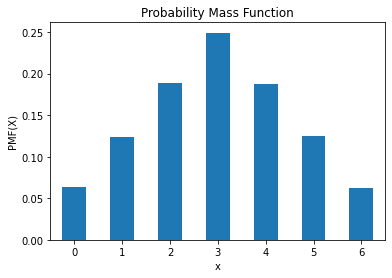

In [ ]:
#Using Pandas series to normalise the count and than plotting the Probability Mass Function
ser = pd.Series(count)
ser = ser/n_samples
ser = ser.sort_index()
plot = ser.plot.bar(xlabel = 'x', ylabel = 'PMF(X)', title = 'Probability Mass Function', rot=0)

To calculate theoretical mean, we use 

$\mu = \sum_{i = 1}^n x_i P(x_i)$ 

Further to calculate variance, we use

$var(X) = \sum_{i = 1}^n (x_i - \mu)^2 P(x_i)$

In [ ]:
#Initialising mean and variance to 0
mean = 0
var = 0

#Looping over number of samples to calculate mean and variance
for i in range(len(ser)):
  mean = mean + i*ser[i]
for i in range(len(list(count.keys()))):
  var = var + ((i - mean)**2)*ser[i]

#Printing calculated Mean and Variance 
print(f"Theoretical Mean is: {mean}")
print(f"Theoretical Variance is: {var}")

Theoretical Mean is: 2.999223333333333
Theoretical Variance is: 2.500469396788889


Further to calculate mean and variance from samples, we make use of direct method using jax.numpy

In [ ]:
#Using jax.numpy to calculate mean and variance
mean = jnp.mean(sum)
var = (jnp.std(sum))**2

#Printing out mean and variance
print(f"Mean is: {mean}")
print(f"Variance is: {var}")

Mean is: 2.999223232269287
Variance is: 2.50046968460083


For calculating Cumulative Distribution Function, we just need to take cumuative sum of probabilities

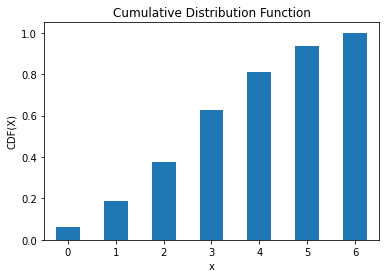

In [ ]:
#Calculating cumulative sum of the distribution
ser = ser.cumsum()
plot = ser.plot.bar(xlabel = 'x', ylabel = 'CDF(X)', title = 'Cumulative Distribution Function', rot=0)

#Discrete Uniform Distribution

Discrete Uniform Distribution is a symmetric probability distribution, wherein all values are equally likely to be observed.

eg: Tossing a coin, rolling a dice

In this example, we plot a uniform distribution from $0$ to $5$. Hence, the sample space here will be $0, 1, 2, 3, 4, 5$. All this values will have equal probability of $0.16$ 

In [ ]:
#Initialising lower and higher value for uniform distribution
low, high = 0, 5

In [ ]:
#We extract 1000000 samples from uniform discrete distribution. 
discrete_uniform_distribution = distrax.Categorical(probs=[1/6]*6)
n_samples = 1000000
key = jax.random.PRNGKey(0)
samples = discrete_uniform_distribution.sample(seed=key, sample_shape=n_samples).round(0)

#Counting number of times, the random variable takes individual values from sample space
count = Counter(map(float, samples.tolist()))
print(f"Number of occurence: {count}")

Number of occurence: Counter({2.0: 167028, 4.0: 166954, 5.0: 166861, 0.0: 166633, 3.0: 166505, 1.0: 166019})


In [ ]:
#Printing the sample space
sample_space = jnp.unique(samples, axis=0)
print(f"Sample Space: {sample_space.tolist()}")

Sample Space: [0, 1, 2, 3, 4, 5]


The Probability Mass Function of Discrete Uniform Distribution follows.

$\text{PMF}(X) = \dfrac{1}{b-a+1}$, 

where $b$ is the lower limit and $a$ is the upper limit of distribution

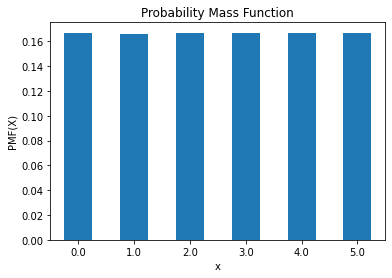

In [ ]:
#Using Pandas series to normalise the count and than plotting the Probability Mass Function
ser = pd.Series(count)
ser = ser/n_samples
ser = ser.sort_index()
plot = ser.plot.bar(xlabel = 'x', ylabel = 'PMF(X)', title = 'Probability Mass Function', rot=0)

To calculate theoretical mean, we use 

$\mu = \dfrac{a + b}{2} = \dfrac{5 - 0}{2} = 2.5$ 

Further to calculate variance, we use

$var(X) = \dfrac{(b-a+1)^2-1}{12} = \dfrac{(5-0+1)^2-1}{12} = 2.91$

In [ ]:
#We calculate mean and variance from given formula
mean = (high + low)/2
n = high - low + 1
var = (n**2 - 1)/12

#Printing calculated Mean and Variance 
print(f"Theoretical Mean is: {mean}")
print(f"Theoretical Variance is: {var}")

Theoretical Mean is: 2.5
Theoretical Variance is: 2.9166666666666665


Further to calculate mean and variance from samples, we make use of direct method using jax.numpy

In [ ]:
#Using jax.numpy to calculate mean and variance
mean = jnp.mean(samples)
var = (jnp.std(samples))**2

#Printing out mean and variance
print(f"Mean is: {mean}")
print(f"Variance is: {var}")

Mean is: 2.501710891723633
Variance is: 2.916907548904419


For calculating Cumulative Distribution Function, we just need to take cumuative sum of probabilities

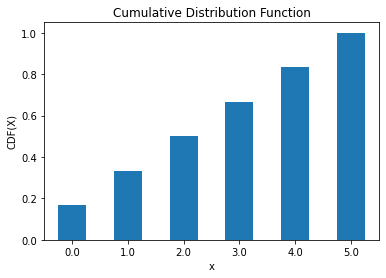

In [ ]:
#Calculating Cumulative Sum of the distribution
ser = ser.cumsum()
plot = ser.plot.bar(xlabel = 'x', ylabel = 'CDF(X)', title = 'Cumulative Distribution Function', rot=0)

#Bernoulli Distribution

Bernoulli Distribution is the discrete probability distribution which takes the value 1 with probability of $p$ and 0 with probability of $1-p$

eg: Tossing a coin can give either Heads(0) or Tails(1)

In this example we consider probability of getting $1$ or Tails to be $0.75$. Hence the probability of getting $0$ or Heads is $1 - 0.75 = 0.25$

In [ ]:
#Initialising Probability for Bernoulli Distribution
prob = 0.75

In [ ]:
#Extracting 10000 random samples from the distribution
coin = distrax.Bernoulli(probs=prob)
key = jax.random.PRNGKey(0)
n_samples = 10000
samples = coin.sample(seed=key, sample_shape=n_samples)

#Counting number of times, the random variable takes individual values from sample space
count = Counter(map(float, samples.tolist()))
print(f"Number of occurence: {count}")

Number of occurence: Counter({1.0: 7484, 0.0: 2516})


In [ ]:
#Printing the Sample Space
sample_space = jnp.unique(samples, axis=0)
print(f"Sample Space: {sample_space.tolist()}")

Sample Space: [0, 1]


The Probability Mass Function of Bernoulli's Distribution follows

$\text{PMF}(X) = p^k (1-p)^{1-k}$

Here $k$ can take either $0$ and $1$, whereas $p$ represents the probability. 

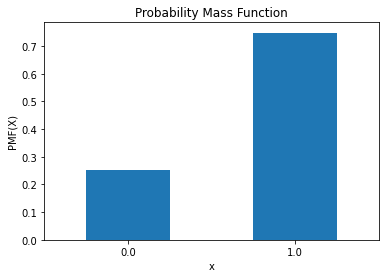

In [ ]:
#Using Pandas series to normalise the count and than plotting the Probability Mass Function
ser = pd.Series(count)
ser = ser/n_samples
ser = ser.sort_index()
plot = ser.plot.bar(xlabel = 'x', ylabel = 'PMF(X)', title = 'Probability Mass Function', rot=0)

The theoretical mean will be equal to probability of getting 1 i.e

$\mu = P(1) =0.75$

Now to calculate theoretical variance, we use

$var(X) = \mu(1-\mu) = 0.75(1-0.75) = 0.1875$

In [ ]:
#We calculate mean and variance from given formula
mean = prob
var = prob*(1-prob)

#Printing calculated Mean and Variance
print(f"Theoretical Mean is {mean}")
print(f"Theoretical Variance is {var}")

Theoretical Mean is 0.75
Theoretical Variance is 0.1875


Further to calculate mean and variance, we make use of direct method using jax.numpy

In [ ]:
#Using jax.numpy to calculate mean and variance
mean = jnp.mean(samples)
var = (jnp.std(samples))**2

#Printing out Mean and Variance
print(f"Mean is: {mean}")
print(f"Variance is: {var}")

Mean is: 0.7483999729156494
Variance is: 0.18829745054244995


For calculating Cumulative Distribution Function, we just need to take cumuative sum of probabilities

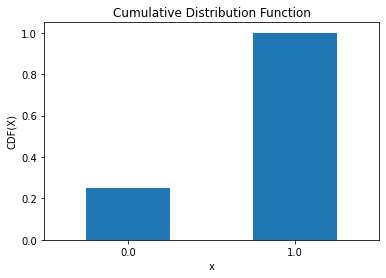

In [ ]:
#Calculating Cumulative Sum of the distribution
ser = ser.cumsum()
plot = ser.plot.bar(xlabel = 'x', ylabel = 'CDF(X)', title = 'Cumulative Distribution Function', rot=0)

#Continuous Uniform Distribution

Continuous Uniform Distribution can be defined as a symmetric distribution wherein we are equally likely to observed all the values.

eg: In Dartboard game, we are equally to get probability of dart hiting on board

In this example, we plot a uniform distribution from $-3$ to $3$

In [ ]:
#Initialising lower and higher value for uniform distribution
low, high = -3, 3

In [ ]:
#We extract 1000000 samples from uniform discrete distribution
continuous_uniform_distribution = distrax.Uniform(low=low, high=high)
n_samples = 1000000
key = jax.random.PRNGKey(0)
samples = continuous_uniform_distribution.sample(seed=key, sample_shape=n_samples)


/usr/local/lib/python3.7/dist-packages/jax/_src/numpy/lax_numpy.py:4457: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax_internal._check_user_dtype_supported(dtype, "astype")


The Probability Distribution Function of Discrete Uniform Distribution follows.

$\text{PDF}(X) = \dfrac{1}{b-a}$, 

where $b$ is the lower limit and $a$ is the upper limit of distribution

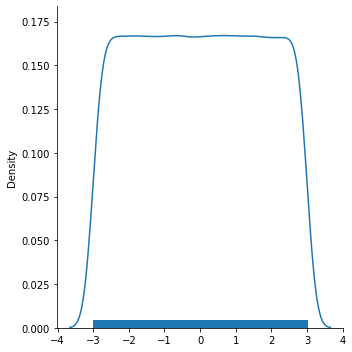

In [ ]:
#We use seaborn to plot PDF of the distribution
sns.displot(samples, kind='kde',bw_adjust=2, rug=True)

To calculate theoretical mean, we use 

$\mu = \dfrac{a + b}{2} = \dfrac{3 - 3}{2} = 0$ 

Further to calculate variance, we use

$var(X) = \dfrac{(b-a+1)^2}{12} = \dfrac{(3-(-3))^2}{12} = 3$

In [ ]:
#We calculate mean and variance from given formula
mean = (high+low)/2
n = high - low
var = (n**2)/12

#Printing calculated Mean and Variance
print(f"Theoretical Mean is: {mean}")
print(f"Theoretical Variance is: {var}")

Theoretical Mean is: 0.0
Theoretical Variance is: 3.0


Further to calculate mean and variance, we make use of direct method using jax.numpy

In [ ]:
#Using jax.numpy to calculate mean and variance
mean = jnp.mean(samples)
var = (jnp.std(samples))**2

#Printing out mean and variance
print(f"Mean is: {mean}")
print(f"Variance is: {var}")

Mean is: 0.0003436896367929876
Variance is: 3.000629186630249


#Continuous Normal Distribution

Continuous normal distribution is a important distribution and is also called as bell shape curve. Their importance is mainly due to the central limit theorem which states that under some conditions, the average of many samples of a random variable with finite mean and variance is itself a random variable whose distribution converges to a normal distribution as the number of samples increases.

In [ ]:
#Initialising mean and standard deviation for normal distribution
mean, std = 0, 2

In [ ]:
#We extract 1000000 samples from continuous normal distribution distribution
continuous_normal_distribution = distrax.Normal(loc=mean, scale=std)
n_samples = 1000000
key = jax.random.PRNGKey(0)
samples = continuous_normal_distribution.sample(seed=key, sample_shape=n_samples)


/usr/local/lib/python3.7/dist-packages/jax/_src/numpy/lax_numpy.py:4457: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax_internal._check_user_dtype_supported(dtype, "astype")


The Probability Distribution Function of normal distribution follows

$\text{PDF}(X) = \dfrac{1}{\sigma \sqrt{2 \pi}} e^{\dfrac{-(x - \mu)^2}{2 \sigma^2}}$ 

where $\mu$ is the mean of the distribution and $\sigma$ is the standard deviation of the distribution

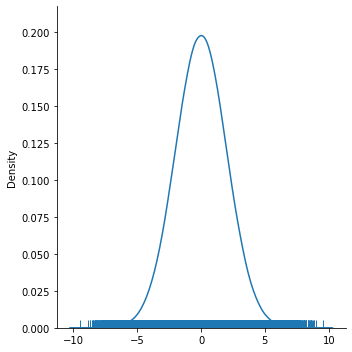

In [ ]:
#We use seaborn to plot PDF of the distribution
sns.displot(samples, kind='kde',bw_adjust=2, rug=True)

The theoretical mean is defined when plotting the distribution i.e $0$ 

Further to calculate variance, we use

$var(X) = \sigma^2 = 2^2 = 4$

In [ ]:
#We calculate variance from given formula
var = std**2

#Printing calculated Mean and Variance
print(f"Theoretical Mean is {mean}")
print(f"Theoretical Variance is {var}")

Theoretical Mean is 0
Theoretical Variance is 4


Further to calculate mean and variance, we make use of direct method using jax.numpy

In [ ]:
#Using jax.numpy to calculate mean and variance
mean = jnp.mean(samples)
var = (jnp.std(samples))**2

#Printing out mean and variance
print(f"Mean is: {mean}")
print(f"Variance is: {var}")

Mean is: 0.0006718216463923454
Variance is: 4.004653453826904


#Continuous Laplacian Distribution

Laplacian Distribution is also called as double exponential distribution as it comprises of 2 exponential distributions. Laplacian Distribution is widely used at many places including signal processing, astronomy and many more.

In [ ]:
#Initialising mean and scale for laplacian distribution
mean = 0
scale = 1

In [ ]:
#We extract 1000000 samples from continous laplacian distribution
discrete_laplace_distribution = distrax.Laplace(loc=mean, scale=scale)
n_samples = 1000000
key = jax.random.PRNGKey(0)
samples = discrete_laplace_distribution.sample(seed=key, sample_shape=n_samples)


/usr/local/lib/python3.7/dist-packages/jax/_src/numpy/lax_numpy.py:4457: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax_internal._check_user_dtype_supported(dtype, "astype")


The Probability Distribution Function of Laplacian Distribution follows.

$\text{PDF}(X) = \dfrac{1}{2b}e^-\dfrac{|x - \mu|}{b}$ 

where $\mu$ is the mean whereas $b$ is called scale of the distribution

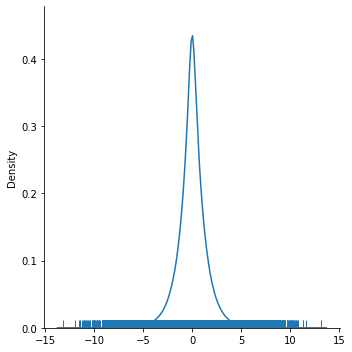

In [ ]:
#We use seaborn to plot PDF of the distribution
sns.displot(samples, kind='kde',bw_adjust=2, rug=True)

The theoretical mean is defined when plotting the distribution i.e $0$ 

Further to calculate variance, we use

$var(X) = 2b^2 = 2\times1^2 = 2$

In [ ]:
#We calculate variance from given formula
var = 2*(scale**2)

#Printing calculated Mean and Variance
print(f"Theoretical Mean is: {mean}")
print(f"Theoretical Variance is: {var}")

Theoretical Mean is: 0
Theoretical Variance is: 2


Further to calculate mean and variance, we make use of direct method using jax.numpy

In [ ]:
#Using jax.numpy to calculate mean and variance
mean = jnp.mean(samples)
var = (jnp.std(samples))**2

#Printing out mean and variance
print(f"Mean is: {mean}")
print(f"Variance is: {var}")

Mean is: -0.0005483661661855876
Variance is: 2.003704786300659


#Continuous Gamma distribution

The gamma distribution term is mostly used as a distribution which is defined using two parameters, shape parameter and inverse scale parameter. It is related to the normal distribution,  exponential distribution, chi-squared distribution and Erlang distribution. 

In [ ]:
#Initialising shape and rate for laplacian distribution
shape, rate = 1, 2

In [ ]:
#We extract 1000000 samples from continous gamma distribution
discrete_gamma_distribution = distrax.Gamma(concentration=shape, rate=rate)
n_samples = 1000000
key = jax.random.PRNGKey(0)
samples = discrete_gamma_distribution.sample(seed=key, sample_shape=n_samples)


/usr/local/lib/python3.7/dist-packages/jax/_src/numpy/lax_numpy.py:4457: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax_internal._check_user_dtype_supported(dtype, "astype")


The Probability Distribution Function of Gamma Distribution follows.

$\text{PDF}(X) = \dfrac{\beta^\alpha}{\Gamma (\alpha)}x^{\alpha - 1}e^{-\beta x}$ 

where $\alpha$ is shape and $\beta$ is called rate of the distribution

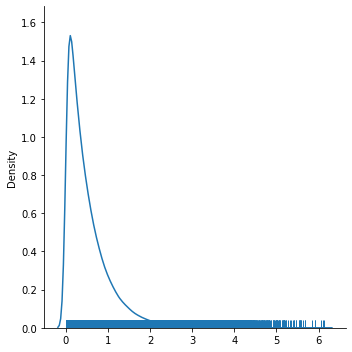

In [ ]:
#We use seaborn to plot PDF of the distribution
sns.displot(samples, kind='kde',bw_adjust=2, rug=True)

To calculate theoretical mean, we use 

$\mu = \dfrac{\alpha}{\beta} = \dfrac{1}{2} = 0.5$ 

Further to calculate variance, we use

$var(X) = \dfrac{\alpha}{\beta^2} = \dfrac{1}{2^2} = 0.25$

In [ ]:
#We calculate variance from given formula
mean = shape/rate
var = shape/rate**2

#Printing calculated Mean and Variance
print(f"Theoretical Mean is {mean}")
print(f"Theoretical Variance is {var}")

Theoretical Mean is 0.5
Theoretical Variance is 0.25


Further to calculate mean and variance, we make use of direct method using jax.numpy

In [ ]:
#Using jax.numpy to calculate mean and variance
mean = jnp.mean(samples)
var = (jnp.std(samples))**2

#Printing out mean and variance
print(f"Mean is: {mean}")
print(f"Variance is: {var}")

Mean is: 0.5001739859580994
Variance is: 0.25029662251472473


In [ ]:
def distributions(mean, std, scale, low, high, shape, rate):
  n_samples = 10000
  key = jax.random.PRNGKey(0)

  continuous_uniform_distribution = distrax.Uniform(low=low, high=high)
  uniform_samples = continuous_uniform_distribution.sample(seed=key, sample_shape=n_samples)

  continuous_normal_distribution = distrax.Normal(loc=mean, scale=std)
  normal_samples = continuous_normal_distribution.sample(seed=key, sample_shape=n_samples)

  discrete_laplace_distribution = distrax.Laplace(loc=mean, scale=scale)
  laplacian_samples = discrete_laplace_distribution.sample(seed=key, sample_shape=n_samples)

  discrete_gamma_distribution = distrax.Gamma(concentration=shape, rate=rate)
  gamma_samples = discrete_gamma_distribution.sample(seed=key, sample_shape=n_samples)

  sns.displot(uniform_samples, kind='kde',bw_adjust=2, rug=True)
  sns.displot(normal_samples, kind='kde',bw_adjust=2, rug=True)
  sns.displot(laplacian_samples, kind='kde',bw_adjust=2, rug=True)
  sns.displot(gamma_samples, kind='kde',bw_adjust=2, rug=True)
  plt.show()



In [ ]:
interactive_plot = interactive(distributions, mean = (-10.,10.), std = (1.,10.), scale = (1.,10.), low = (-10.,0), high = (0,10.), shape = (1.,10.), rate = (1.,10.))
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='mean', max=10.0, min=-10.0), FloatSlider(value=5.5, …